In [64]:
import matplotlib.pyplot as plt
import polars as pl

In [65]:
df = pl.read_csv("../experiments/alzheimers_disease/n_hidden_1_dims_hidden_1_64.csv")

In [66]:
df

n_hidden,dim_hidden,bayesian_roc_auc_train,bayesian_roc_auc_test,classic_0_roc_auc_train,classic_0_roc_auc_test,classic_0.0001_roc_auc_train,classic_0.0001_roc_auc_test,classic_0.001_roc_auc_train,classic_0.001_roc_auc_test,classic_0.01_roc_auc_train,classic_0.01_roc_auc_test,classic_0.1_roc_auc_train,classic_0.1_roc_auc_test
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,1,0.907347,0.899566,0.909205,0.893868,0.909186,0.894092,0.909253,0.893065,0.908589,0.892475,0.90885,0.89165
1,2,0.906772,0.89933,0.948627,0.922678,0.94834,0.924129,0.946633,0.923645,0.928096,0.906562,0.910553,0.896982
1,3,0.941696,0.931219,0.957181,0.925167,0.958171,0.91226,0.951262,0.909771,0.942671,0.916496,0.910688,0.89677
1,4,0.938317,0.935077,0.959414,0.911234,0.960463,0.92138,0.955643,0.910738,0.946394,0.914183,0.910593,0.897218
1,5,0.941939,0.931408,0.953615,0.873894,0.96082,0.897855,0.961254,0.904792,0.9484,0.915882,0.910641,0.897572
…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,60,0.94996,0.933437,1.0,0.845119,1.0,0.875392,1.0,0.889078,0.97702,0.913003,0.910657,0.897053
1,61,0.949169,0.936764,1.0,0.827187,1.0,0.864998,1.0,0.874236,0.976742,0.913263,0.910799,0.89743
1,62,0.948624,0.939525,1.0,0.850688,1.0,0.873882,1.0,0.878389,0.976411,0.912626,0.910718,0.897525


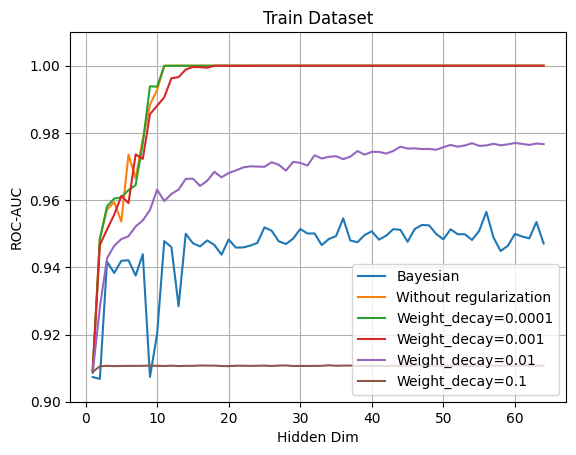

In [67]:
fig, ax = plt.subplots()
ax.plot(df["dim_hidden"], df["bayesian_roc_auc_train"], label="Bayesian")
ax.plot(df["dim_hidden"], df["classic_0_roc_auc_train"], label="Without regularization")
ax.plot(
    df["dim_hidden"], df["classic_0.0001_roc_auc_train"], label="Weight_decay=0.0001"
)
ax.plot(df["dim_hidden"], df["classic_0.001_roc_auc_train"], label="Weight_decay=0.001")
ax.plot(df["dim_hidden"], df["classic_0.01_roc_auc_train"], label="Weight_decay=0.01")
ax.plot(df["dim_hidden"], df["classic_0.1_roc_auc_train"], label="Weight_decay=0.1")
ax.set_xlabel("Hidden Dim")
ax.set_ylabel("ROC-AUC")
ax.set_title("Train Dataset")
ax.legend()
ax.grid(True)
ax.set_ylim(bottom=0.9, top=1.01)
plt.show()

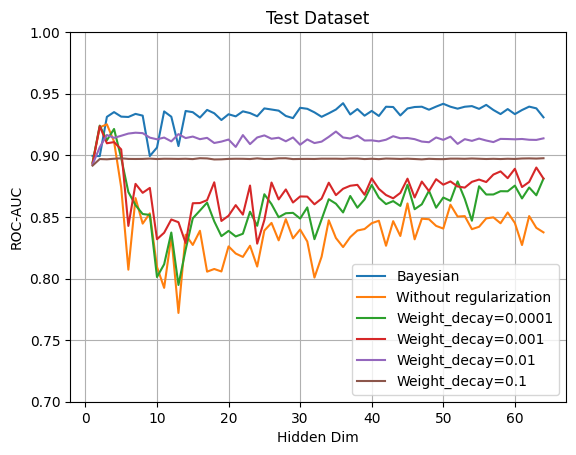

In [68]:
fig, ax = plt.subplots()
ax.plot(df["dim_hidden"], df["bayesian_roc_auc_test"], label="Bayesian")
ax.plot(df["dim_hidden"], df["classic_0_roc_auc_test"], label="Without regularization")
ax.plot(
    df["dim_hidden"], df["classic_0.0001_roc_auc_test"], label="Weight_decay=0.0001"
)
ax.plot(df["dim_hidden"], df["classic_0.001_roc_auc_test"], label="Weight_decay=0.001")
ax.plot(df["dim_hidden"], df["classic_0.01_roc_auc_test"], label="Weight_decay=0.01")
ax.plot(df["dim_hidden"], df["classic_0.1_roc_auc_test"], label="Weight_decay=0.1")
ax.set_xlabel("Hidden Dim")
ax.set_ylabel("ROC-AUC")
ax.set_title("Test Dataset")
ax.legend()
ax.grid(True)
ax.set_ylim(bottom=0.7, top=1)
plt.show()